In [49]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.linear_model import LinearRegression  # For creating a Linear Regression model
from sklearn.metrics import mean_squared_error  # For evaluating the model performance

# Load the dataset
data = pd.read_csv("Advertising.csv")

# Display the first few rows of the dataset
print(data.head())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [50]:
#Exploratory Data Analysis (EDA):
#description of data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400

In [51]:
# Check for null values
print("Checking for null values:")
print(data.isnull().sum())


#it shows it has no null values

Checking for null values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [52]:
# Check for non-numeric values
print("\nChecking for non-numeric values:")
for column in data.columns:
    if not np.issubdtype(data[column].dtype, np.number):
        print(f"Non-numeric values found in column: {column}")
# Convert any non-numeric values to numeric if necessary
# In this case, we assume all columns should be numeric, so no conversion is shown



Checking for non-numeric values:


In [53]:
# Check for infinite values
print("\nChecking for infinite values:")
print(np.isinf(data).sum())
#it shows it has no infinite values


Checking for infinite values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


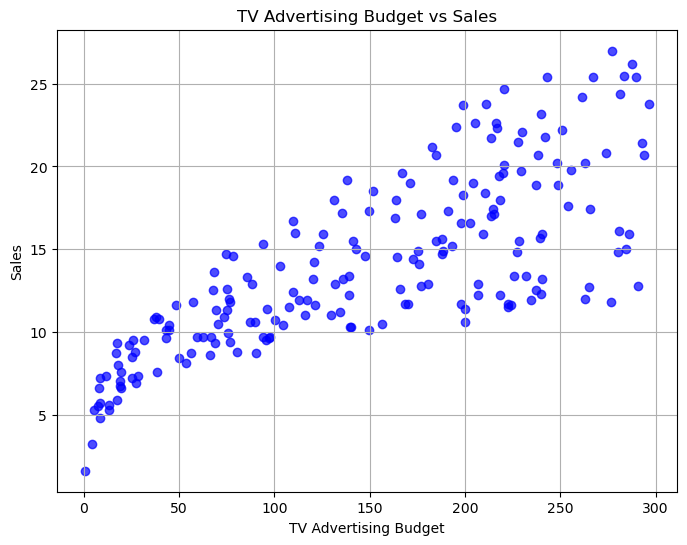

In [54]:
# Scatter plot for TV advertising budget vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['TV'], data['Sales'], color='blue', alpha=0.7)
plt.title('TV Advertising Budget vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

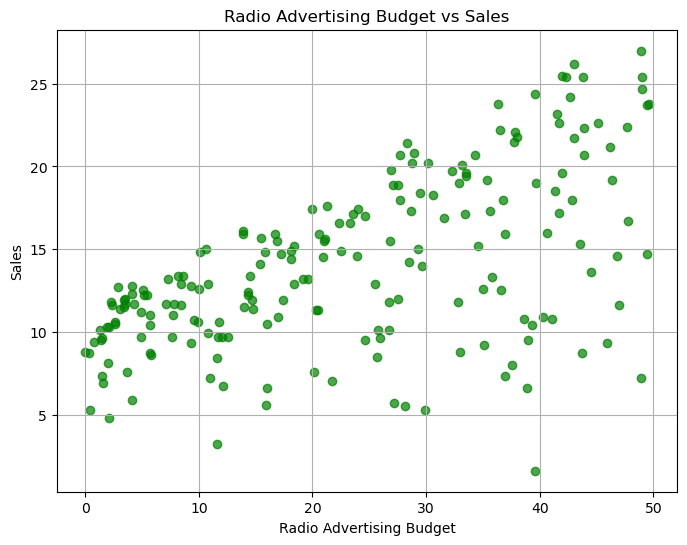

In [55]:
# Scatter plot for Radio advertising budget vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Radio'], data['Sales'], color='green', alpha=0.7)
plt.title('Radio Advertising Budget vs Sales')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


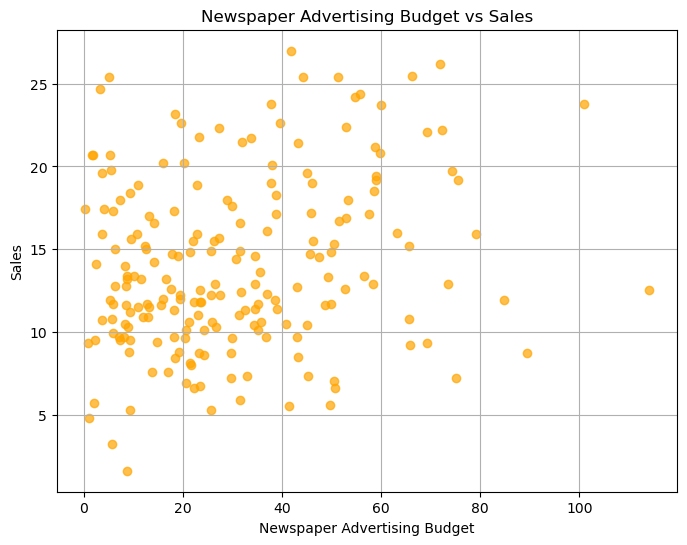

In [56]:
# Scatter plot for Newspaper advertising budget vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Newspaper'], data['Sales'], color='orange', alpha=0.7)
plt.title('Newspaper Advertising Budget vs Sales')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [57]:
# Create boxplots to identify outliers
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

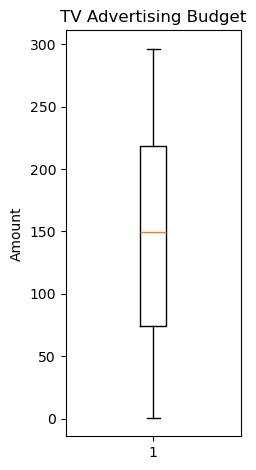

In [58]:
# Boxplot for TV advertising budget
plt.subplot(1, 3, 1)
plt.boxplot(data['TV'])
plt.title('TV Advertising Budget')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

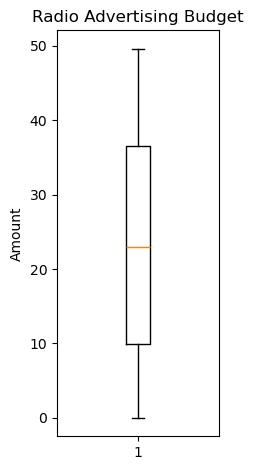

In [59]:
# Boxplot for Radio advertising budget
plt.subplot(1, 3, 2)
plt.boxplot(data['Radio'])
plt.title('Radio Advertising Budget')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

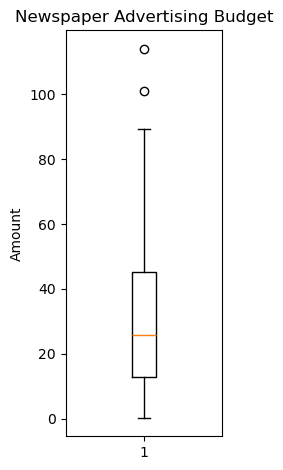

In [60]:
# Boxplot for Newspaper advertising budget
plt.subplot(1, 3, 3)
plt.boxplot(data['Newspaper'])
plt.title('Newspaper Advertising Budget')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

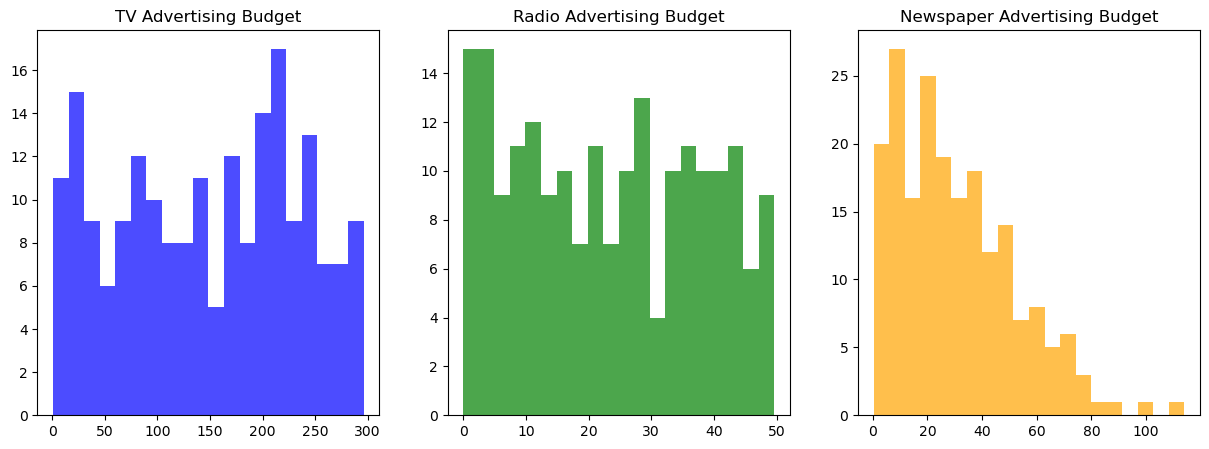

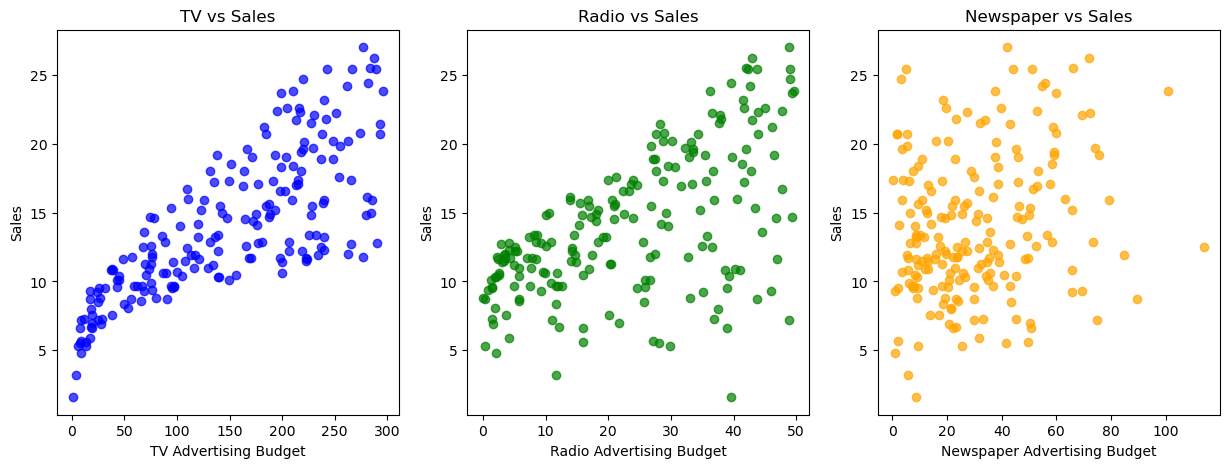

In [61]:

# Distribution of advertising budgets
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(data['TV'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('TV Advertising Budget')
axs[1].hist(data['Radio'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Radio Advertising Budget')
axs[2].hist(data['Newspaper'], bins=20, color='orange', alpha=0.7)
axs[2].set_title('Newspaper Advertising Budget')
plt.show()

# Relationship between advertising budgets and sales
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(data['TV'], data['Sales'], color='blue', alpha=0.7)
axs[0].set_title('TV vs Sales')
axs[0].set_xlabel('TV Advertising Budget')
axs[0].set_ylabel('Sales')
axs[1].scatter(data['Radio'], data['Sales'], color='green', alpha=0.7)
axs[1].set_title('Radio vs Sales')
axs[1].set_xlabel('Radio Advertising Budget')
axs[1].set_ylabel('Sales')
axs[2].scatter(data['Newspaper'], data['Sales'], color='orange', alpha=0.7)
axs[2].set_title('Newspaper vs Sales')
axs[2].set_xlabel('Newspaper Advertising Budget')
axs[2].set_ylabel('Sales')
plt.show()

In [62]:
# Separating features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Features: TV, Radio, Newspaper advertising budgets
y = data['Sales']  # Target variable: Sales

In [63]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# Convert the scaled features back to DataFrame for visualization (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [65]:
# Visualize the scaled features
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Amount')

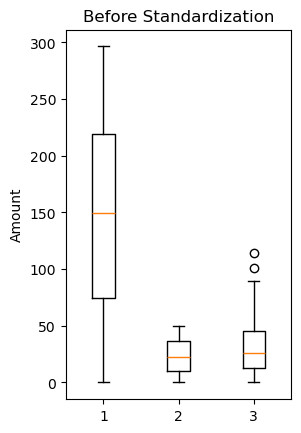

In [66]:
# Before scaling
plt.subplot(1, 2, 1)
plt.boxplot(X)
plt.title('Before Standardization')
plt.ylabel('Amount')

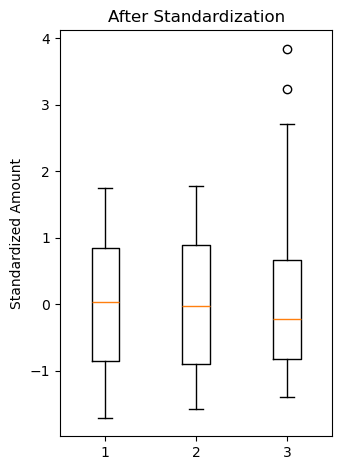

In [67]:

# After scaling
plt.subplot(1, 2, 2)
plt.boxplot(X_scaled_df)
plt.title('After Standardization')
plt.ylabel('Standardized Amount')

plt.tight_layout()
plt.show()

In [68]:
# Create new features
data['Total Spend'] = data['TV'] + data['Radio'] + data['Newspaper']
data['TV * Radio'] = data['TV'] * data['Radio']
data['TV * Newspaper'] = data['TV'] * data['Newspaper']
data['Radio * Newspaper'] = data['Radio'] * data['Newspaper']

# Display the first few rows of the updated dataset
print("\nDataset with new features:")
print(data.head())


Dataset with new features:
   Unnamed: 0     TV  Radio  Newspaper  Sales  Total Spend  TV * Radio  \
0           1  230.1   37.8       69.2   22.1        337.1     8697.78   
1           2   44.5   39.3       45.1   10.4        128.9     1748.85   
2           3   17.2   45.9       69.3    9.3        132.4      789.48   
3           4  151.5   41.3       58.5   18.5        251.3     6256.95   
4           5  180.8   10.8       58.4   12.9        250.0     1952.64   

   TV * Newspaper  Radio * Newspaper  
0        15922.92            2615.76  
1         2006.95            1772.43  
2         1191.96            3180.87  
3         8862.75            2416.05  
4        10558.72             630.72  


In [69]:
# Save the updated dataset with new features
data.to_csv("Advertising_with_new_features.csv", index=False)

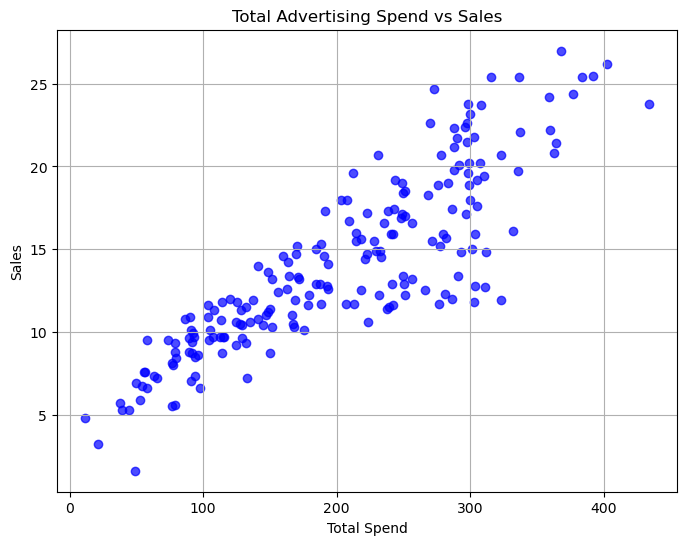

In [70]:
# Scatter plot for Total Spend vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Total Spend'], data['Sales'], color='blue', alpha=0.7)
plt.title('Total Advertising Spend vs Sales')
plt.xlabel('Total Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [71]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Creating a linear regression model
model = LinearRegression()
reg = LinearRegression()



In [73]:
# Training the model
model.fit(X_train, y_train)



LinearRegression()

In [74]:

# Printing the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:")
print(coefficients)

Coefficients:
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


In [77]:
#Applying standard scaler on the data
scale=StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[ 0.15781217,  0.59112727,  1.13227461],
       [ 0.53925283,  1.68199613,  1.13227461],
       [ 1.69783431,  0.36753303,  0.65380096],
       [-1.64363349,  0.95023317,  0.75245532],
       [ 0.83513672,  1.77007871, -1.31928629],
       [-0.89025846,  0.82149709,  1.12240918],
       [ 0.79354661,  1.42452397, -0.13543394],
       [-1.18851892, -0.76398933, -0.56951314],
       [ 0.86009078, -1.31958713, -0.8309472 ],
       [ 0.29803023, -0.02545078,  0.07667294],
       [-1.40835233,  0.11683646, -1.36861347],
       [-1.11484502, -1.16374872, -0.01211599],
       [ 1.00387371, -1.31958713,  2.70581169],
       [-1.71849568,  0.47594236, -1.01345777],
       [-0.12500054, -1.40766971, -0.16503025],
       [ 0.23980408, -1.02146148,  0.25918351],
       [-1.69591819,  0.35398186,  0.56501203],
       [ 0.56539519,  0.02875388, -0.7766873 ],
       [-0.88788188, -0.17451361,  0.12600012],
       [ 1.03833409,  0.31332837, -0.93453428],
       [ 0.94445928,  0.63855635,  2.182

In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#Fitting the model on training data :
reg.fit(X_train, y_train)

LinearRegression()

In [82]:
#Predicting the target
#Predicted data stored in y_pred_train
y_pred_train=reg.predict(X_train)

#Predicting the target
#Predicted data stored in y_pred_test
y_pred_test=reg.predict(X_test)

In [83]:
#model evaluation
#prediction Accuracy in terms of how close is the predicated value of the target
#to real value in the training data set
from sklearn .metrics import r2_score
r2_S=r2_score(y_train, y_pred_train)
r2_S

0.8957008271017818

In [84]:
#prediction Accuracy in terms of how close is the predicated value of the target
#to real value in the testing data set
r2_S=r2_score(y_test, y_pred_test)
r2_S

0.899438024100912

In [86]:
# Training the model
model.fit(X_train, y_train)
# Making predictions
y_pred = model.predict(X_test)

In [87]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.1740973539761046
